In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [9]:
from dataloader import FaceKeypointsDataset
from data_augment import Rescale, RandomCrop
from learn import train, test
import cnn
from display import show_keypoints

In [10]:
from pathlib import Path
ROOT_DIR = Path("imm_face_db")

In [11]:
# Initialite Datasets and Dataloaders

ROOT_DIR = Path("imm_face_db")

# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
training_set = FaceKeypointsDataset(idxs=np.arange(32), root_dir=ROOT_DIR, transform=True)
train_loader=DataLoader(training_set,batch_size=16, shuffle=True)

# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
validation_set = FaceKeypointsDataset(idxs=np.arange(32, 40), root_dir=ROOT_DIR)
test_loader=DataLoader(validation_set,batch_size=1, shuffle=False)

image.shape = (240, 320)


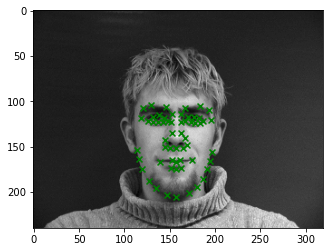

In [13]:
# Plotting a few input images and their face keypoints.
sample = training_set[0]
image, points = sample
show_keypoints(image, points)

In [ ]:
# Training and Testing

epochs = 5

for ep in range(epochs):
    trained_model, train_loss = train(train_loader, model=cnn.FaceFinder(), learning_rate=1e-3)
    valid_loss = test(test_loader, trained_model, show_every=12)
    print_epoch(ep, train_loss, valid_loss)

In [ ]:
test(test_loader, trained_model)